In [1]:
!nvidia-smi

Sun Dec  8 14:29:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Install dependencjes

**Note:** Let's install the `inference-gpu` library, which will be used to efficiently run our object detection and keypoint detection models on GPUs. `inference-gpu` utilizes the `onnxruntime-gpu` library internally for optimal performance. We'll install a specific version of `onnxruntime-gpu` to guarantee compatibility with the CUDA 12 environment in Google Colab.

In [2]:
!pip install -q gdown inference-gpu
!pip install -q onnxruntime-gpu==1.18.0 --index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.7/880.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 5.8 MB/s et

**Note:** Let's install the sports repository directly from GitHub. The sports repository contains a variety of football-related utilities that we'll use along the way.

In [3]:
!pip install -q git+https://github.com/yashchhillar/sports1.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


**Note:** Let's make sure we have the latest features in the supervision library by installing version `0.23.0` or higher.

In [4]:
!pip uninstall -y supervision && pip install -q supervision>=0.23.0

Found existing installation: supervision 0.22.0
Uninstalling supervision-0.22.0:
  Successfully uninstalled supervision-0.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference-gpu 0.29.2 requires supervision<=0.22.0,>=0.21.0, but you have supervision 0.25.0 which is incompatible.


**Note:** Let's download a few sample videos from the [DFL - Bundesliga Data Shootout](https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout) Kaggle competition using gdown.



In [9]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:01<00:00, 19.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 71.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 33.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 31.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 82.2MB/s]


In [6]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

## ball, player, goalkeeper and referee detection

In [7]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

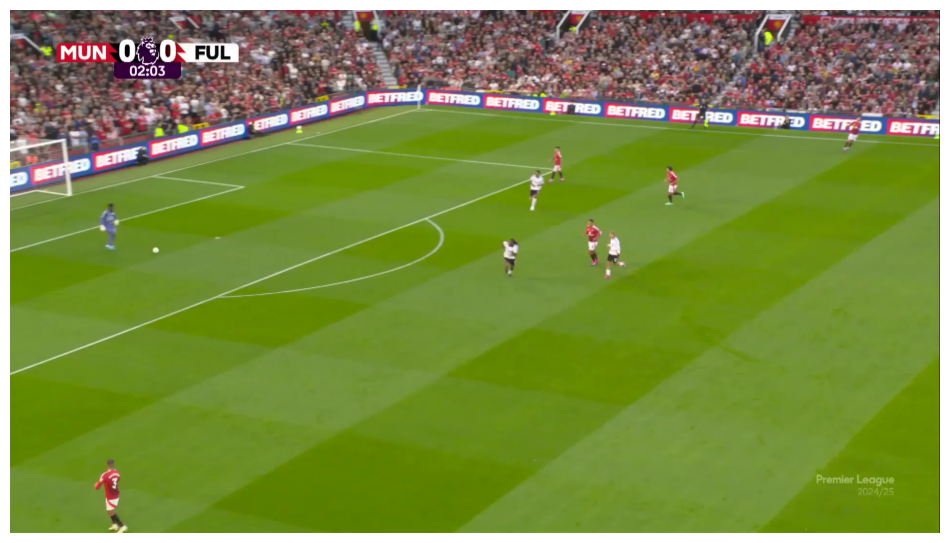

In [10]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/video1.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

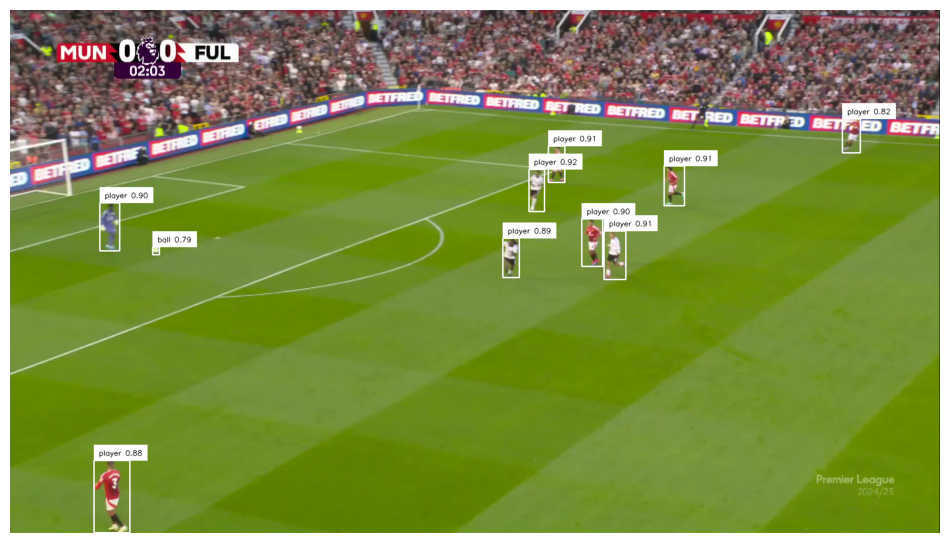

In [15]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/video1.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FFFFFF', '#FFFFFF', '#FFFFFF', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(
    scene=annotated_frame,
    detections=detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=detections,
    labels=labels)

sv.plot_image(annotated_frame)

## cirular visualization

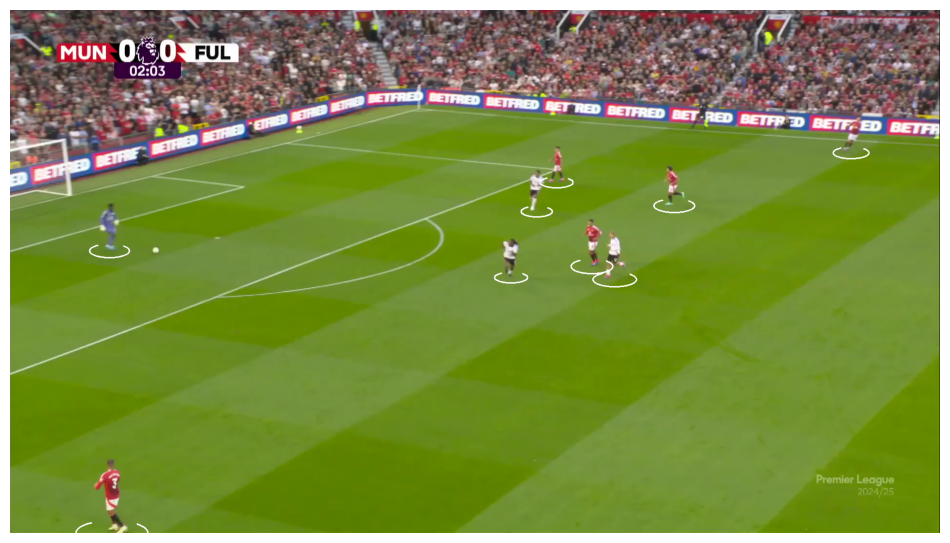

In [19]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/video1.mp4"
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#FFFFFF', '#FFFFFF', '#FFD700']),
    thickness=2
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)


sv.plot_image(annotated_frame)

## player tracking

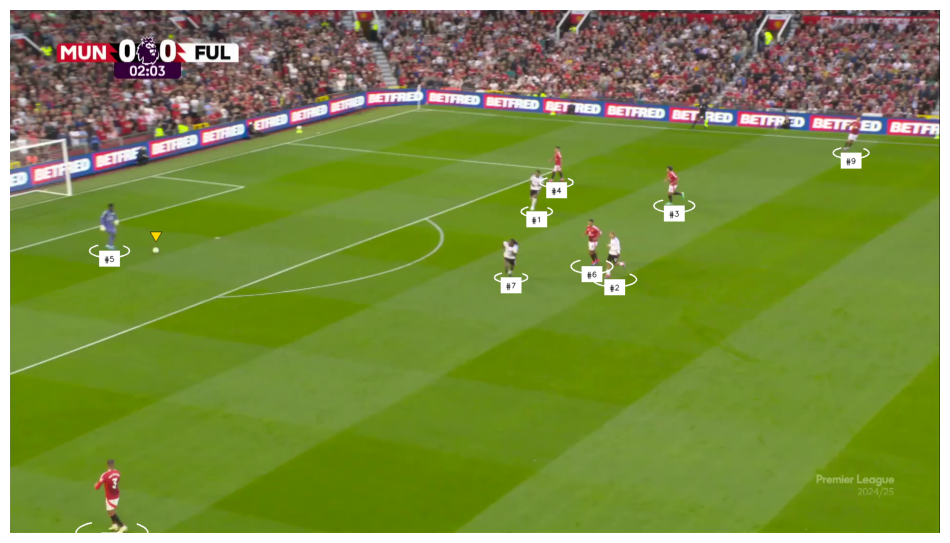

In [20]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/video1.mp4"
BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FFFFFF', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FFFFFF', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

In [21]:
import supervision as sv
import cv2
import numpy as np

# Constants
SOURCE_VIDEO_PATH = "/content/video1.mp4"
OUTPUT_VIDEO_PATH = "/content/annotated_video.mp4"
BALL_ID = 0
CONFIDENCE_THRESHOLD = 0.3
NMS_THRESHOLD = 0.5
FPS = 30
PIXELS_TO_METERS = 0.0519
MAX_PACE = 30
HISTORY_LENGTH = 60  # Extended history window
LOW_PASS_ALPHA = 0.02  # Stronger smoothing for very gradual changes
MAX_PACE_JUMP = 5  # Restrict jumps further

# Annotators
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FFFFFF', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FFFFFF', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)

# Initialize ByteTrack tracker
tracker = sv.ByteTrack()
tracker.reset()

# Store player positions and smoothed pace
position_history = {}
smoothed_pace_history = {}

# OpenCV Video Writer
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
first_frame = next(frame_generator)
frame_height, frame_width = first_frame.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_writer = cv2.VideoWriter(OUTPUT_VIDEO_PATH, fourcc, FPS, (frame_width, frame_height))

# Video Processing Loop
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
for frame_idx, frame in enumerate(frame_generator):
    # Perform detection using the model
    result = PLAYER_DETECTION_MODEL.infer(frame, confidence=CONFIDENCE_THRESHOLD)[0]
    detections = sv.Detections.from_inference(result)

    # Separate ball and player detections
    ball_detections = detections[detections.class_id == BALL_ID]
    ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

    player_detections = detections[detections.class_id != BALL_ID]
    player_detections = player_detections.with_nms(threshold=NMS_THRESHOLD, class_agnostic=True)
    player_detections.class_id -= 1

    # Update tracking IDs
    player_detections = tracker.update_with_detections(detections=player_detections)

    # Calculate player pace in km/h
    labels = []
    for tracker_id, bbox in zip(player_detections.tracker_id, player_detections.xyxy):
        # Calculate centroid of bounding box
        x1, y1, x2, y2 = bbox
        centroid = ((x1 + x2) / 2, (y1 + y2) / 2)

        # Update position history
        if tracker_id not in position_history:
            position_history[tracker_id] = []
        position_history[tracker_id].append(centroid)
        if len(position_history[tracker_id]) > HISTORY_LENGTH:
            position_history[tracker_id].pop(0)

        # Calculate instantaneous pace
        pace = 0
        if len(position_history[tracker_id]) > 1:
            distances = [
                np.linalg.norm(np.array(position_history[tracker_id][i]) - np.array(position_history[tracker_id][i - 1]))
                for i in range(1, len(position_history[tracker_id]))
            ]
            avg_distance_pixels = np.mean(distances)
            distance_meters = avg_distance_pixels * PIXELS_TO_METERS
            pace = (distance_meters * FPS * 3600) / 1000  # Convert to km/h

        # Apply stronger smoothing
        if tracker_id not in smoothed_pace_history:
            smoothed_pace_history[tracker_id] = pace
        else:
            # Apply adaptive low-pass filter
            filtered_pace = (
                LOW_PASS_ALPHA * pace + (1 - LOW_PASS_ALPHA) * smoothed_pace_history[tracker_id]
            )

            # Cap large jumps
            smoothed_pace_history[tracker_id] = min(
                max(filtered_pace, smoothed_pace_history[tracker_id] - MAX_PACE_JUMP),
                smoothed_pace_history[tracker_id] + MAX_PACE_JUMP
            )

        # Ignore unrealistic spikes
        final_smoothed_pace = smoothed_pace_history[tracker_id]
        if final_smoothed_pace > MAX_PACE:
            final_smoothed_pace = 0

        labels.append(f"#{tracker_id} | Pace: {final_smoothed_pace:.2f} km/h")

    # Annotate the frame
    annotated_frame = frame.copy()
    annotated_frame = ellipse_annotator.annotate(
        scene=annotated_frame,
        detections=player_detections
    )
    annotated_frame = label_annotator.annotate(
        scene=annotated_frame,
        detections=player_detections,
        labels=labels
    )

    # Write the annotated frame to the output video
    output_writer.write(annotated_frame)

# Release resources
output_writer.release()
print(f"Annotated video with player pace (km/h) saved to {OUTPUT_VIDEO_PATH}")


Annotated video with player pace (km/h) saved to /content/annotated_video.mp4


In [22]:
from google.colab import files

# Download the output video file
files.download(OUTPUT_VIDEO_PATH)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>